(223, 19)
T1Y Index      float64
T2Y Index      float64
T3Y Index      float64
T5Y Index      float64
T7Y Index      float64
T10Y Index     float64
CP1M           float64
CP3M           float64
CP6M           float64
CP1M_T1Y       float64
CP3M_T1Y       float64
CP6M_T1Y       float64
CP1M_T2Y       float64
CP3M_T2Y       float64
CP6M_T2Y       float64
USPHCI         float64
PCT 3MO FWD    float64
PCT 6MO FWD    float64
PCT 9MO FWD    float64
dtype: object
        T1Y Index   T2Y Index   T3Y Index   T5Y Index   T7Y Index  T10Y Index  \
count  223.000000  223.000000  223.000000  223.000000  223.000000  223.000000   
mean     8.030717    8.410673    8.563587    8.808655    8.979776    9.073498   
std      3.158575    2.954431    2.820405    2.647742    2.542686    2.447525   
min      3.180000    3.840000    4.170000    4.710000    5.050000    5.330000   
25%      5.735000    6.180000    6.410000    6.695000    6.965000    7.175000   
50%      7.670000    8.000000    8.130000    8.330000

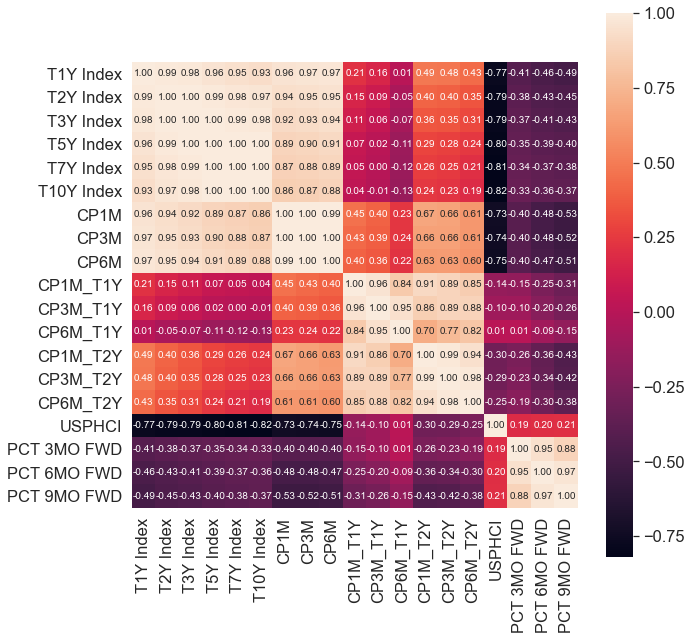

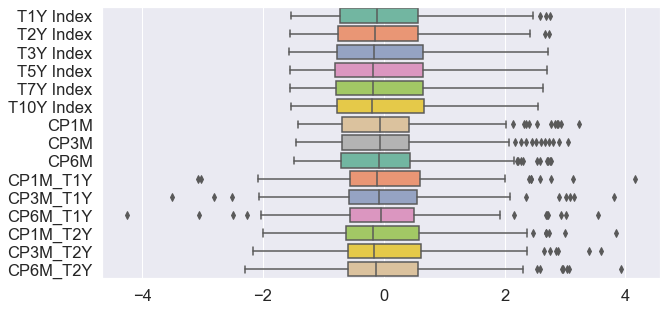

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

df = pd.read_csv('MLF_GP2_EconCycle.csv')
df=df.drop(['Date'],axis=1)
a=pd.Series.tolist(df['CP1M']/df['T2Y Index'])
df.insert(12,'CP1M_T2Y',a)
a=pd.Series.tolist(df['CP3M']/df['T2Y Index'])
df.insert(13,'CP3M_T2Y',a)
a=pd.Series.tolist(df['CP6M']/df['T2Y Index'])
df.insert(14,'CP6M_T2Y',a)
X = df.iloc[:,:15].values
y = df.iloc[:,16:19].values
y_names = df.columns[16:19]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

print(df.shape)
nrow = df.shape[0]
ncol = df.shape[1]

#show the different types in columns
print(df.dtypes)
#print summary of data frame
summary =df.describe()
print(summary)

#visualize correlations using heatmap
corMat = DataFrame(df.corr())
plt.figure(1,figsize = (10,10))
col = df.columns
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,
               cbar=True,
               annot=True,
               square=True,
               fmt='.2f',
               annot_kws={'size':10},
               yticklabels=(col),
               xticklabels=(col)
               )
plt.show()


#box-plot
X_b = df.drop(['PCT 3MO FWD','PCT 6MO FWD','PCT 9MO FWD','USPHCI'],axis=1)
column = list(X_b.columns.values)
scaler = StandardScaler().fit(X_b)
X_box = scaler.transform(X_b)
X_box = pd.DataFrame(X_box)
X_box.columns=column
plt.figure(3,figsize = (10,5))
_ = sns.boxplot(data=X_box, orient="h", palette="Set2")
plt.show()

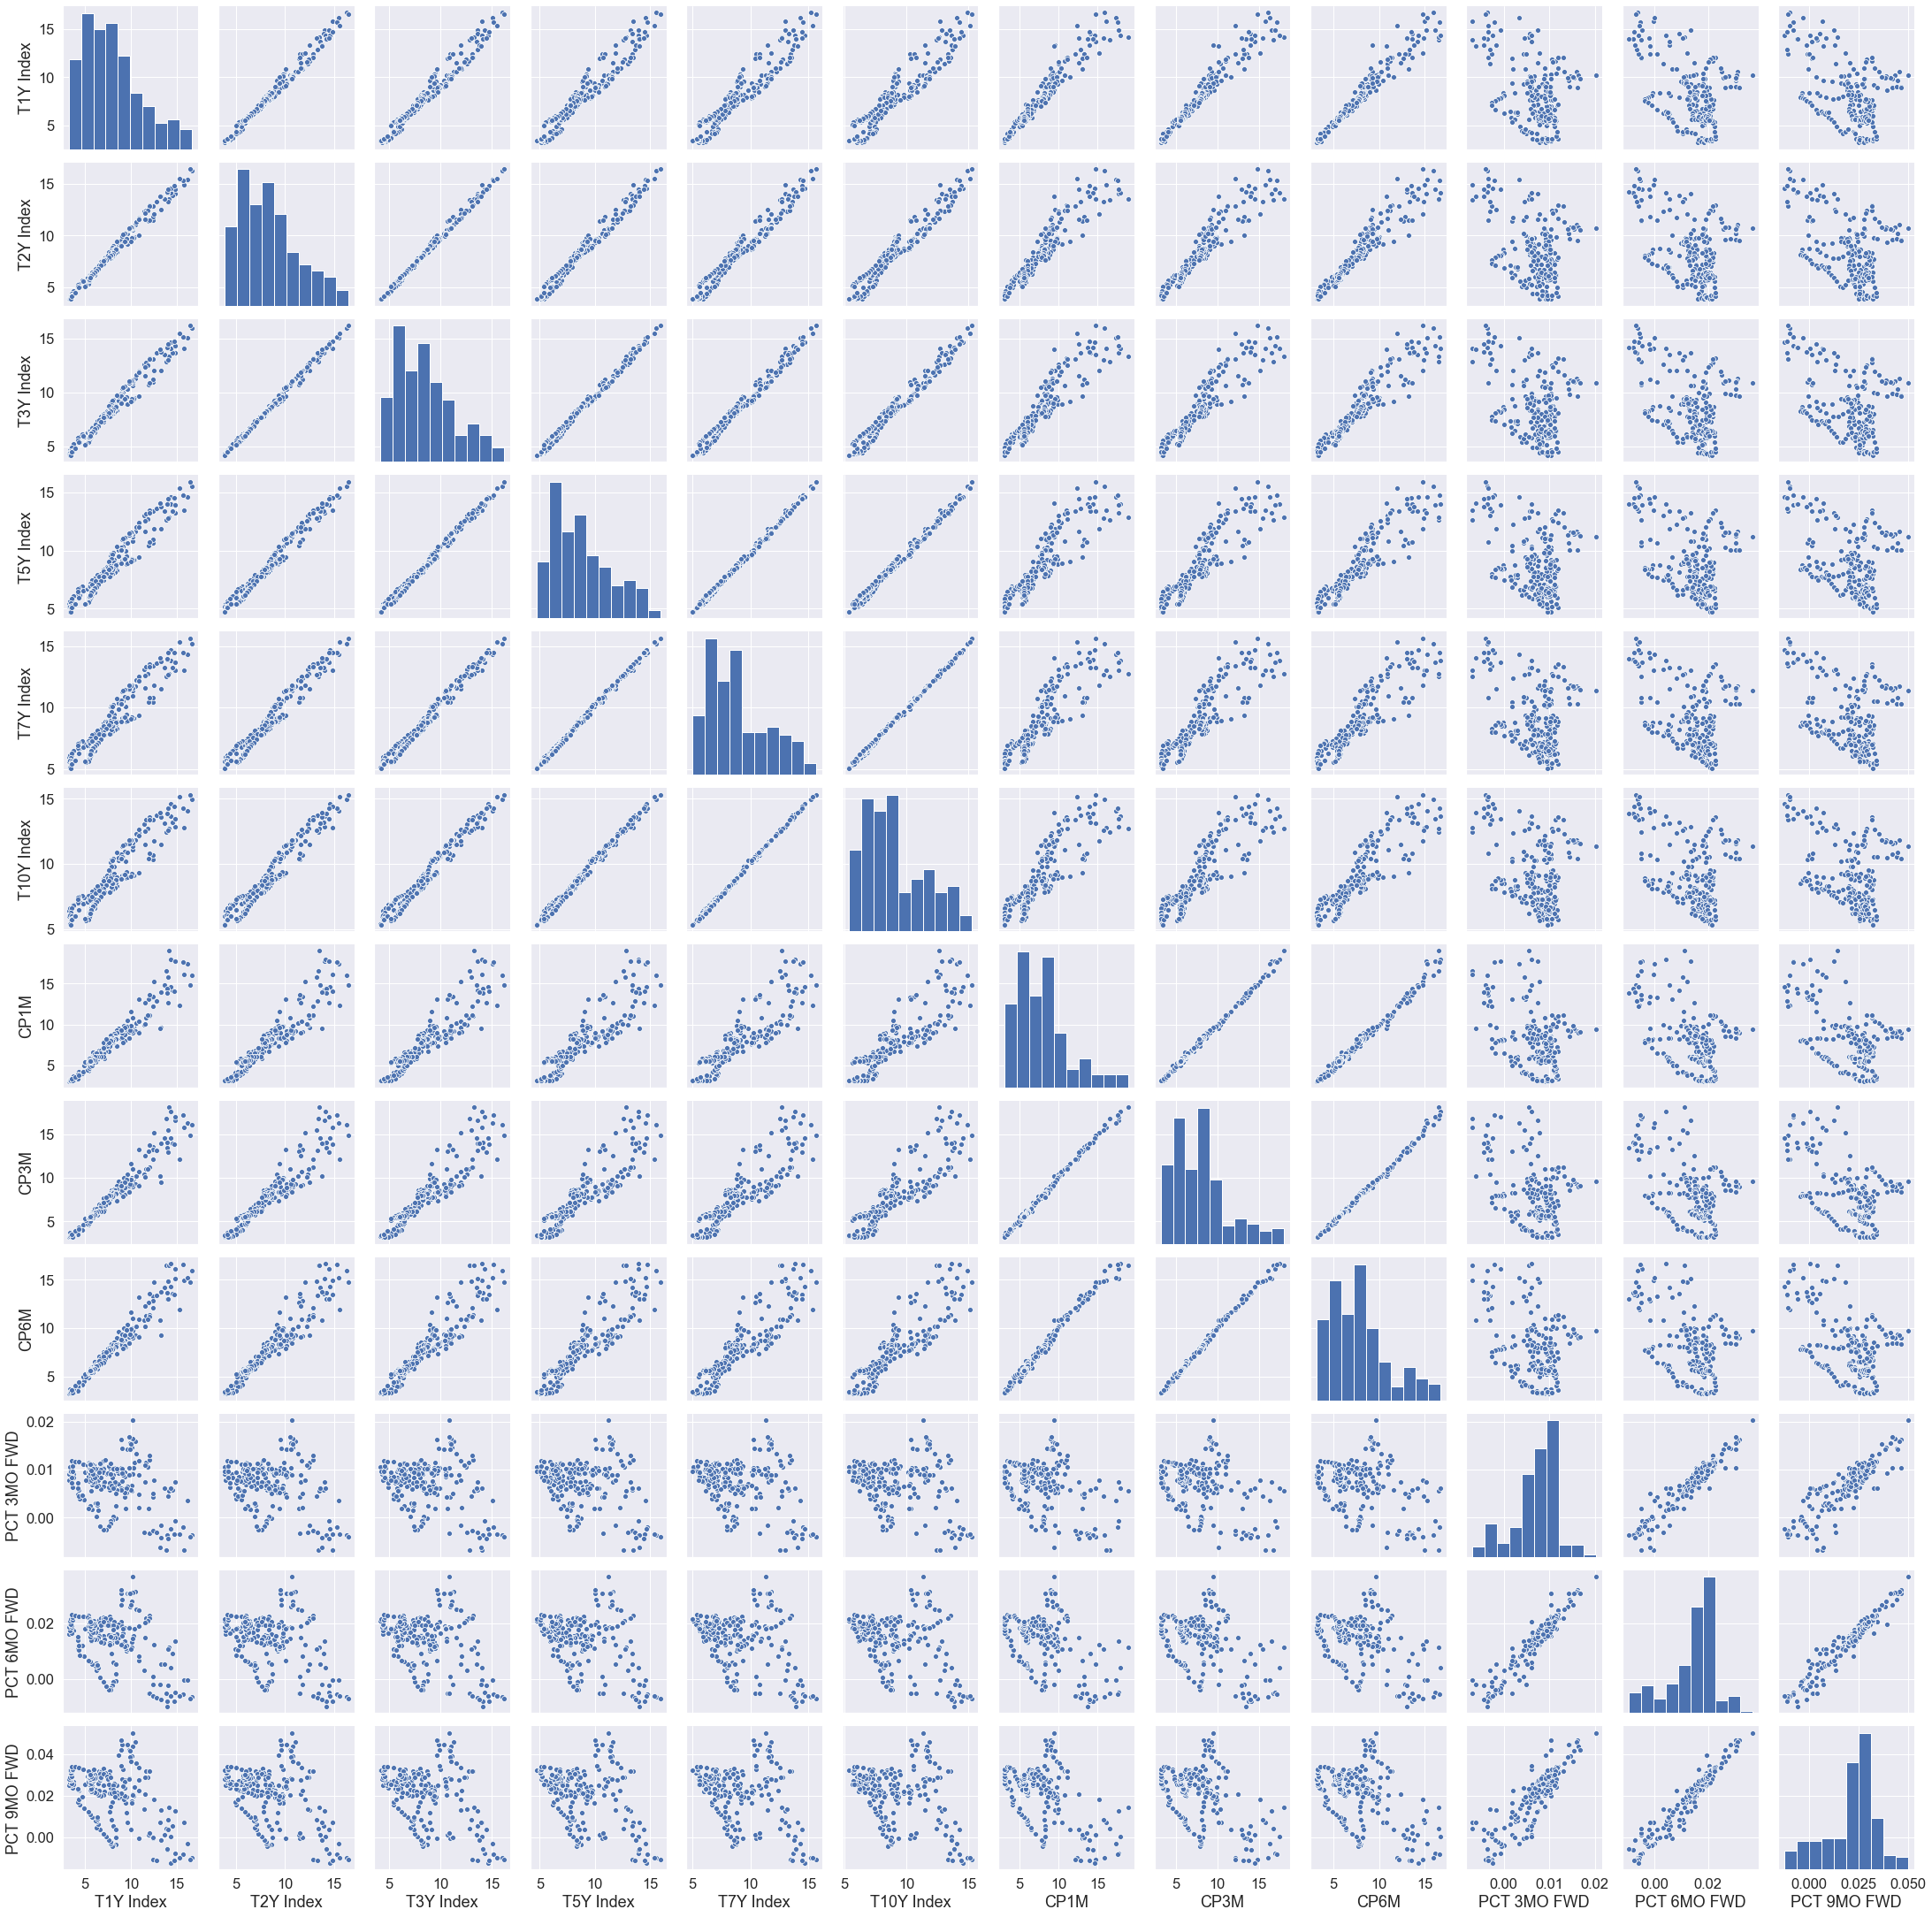

In [48]:
pair = df.iloc[:,[0,1,2,3,4,5,6,7,8,16,17,18]]
sns.pairplot(pair)
plt.show()

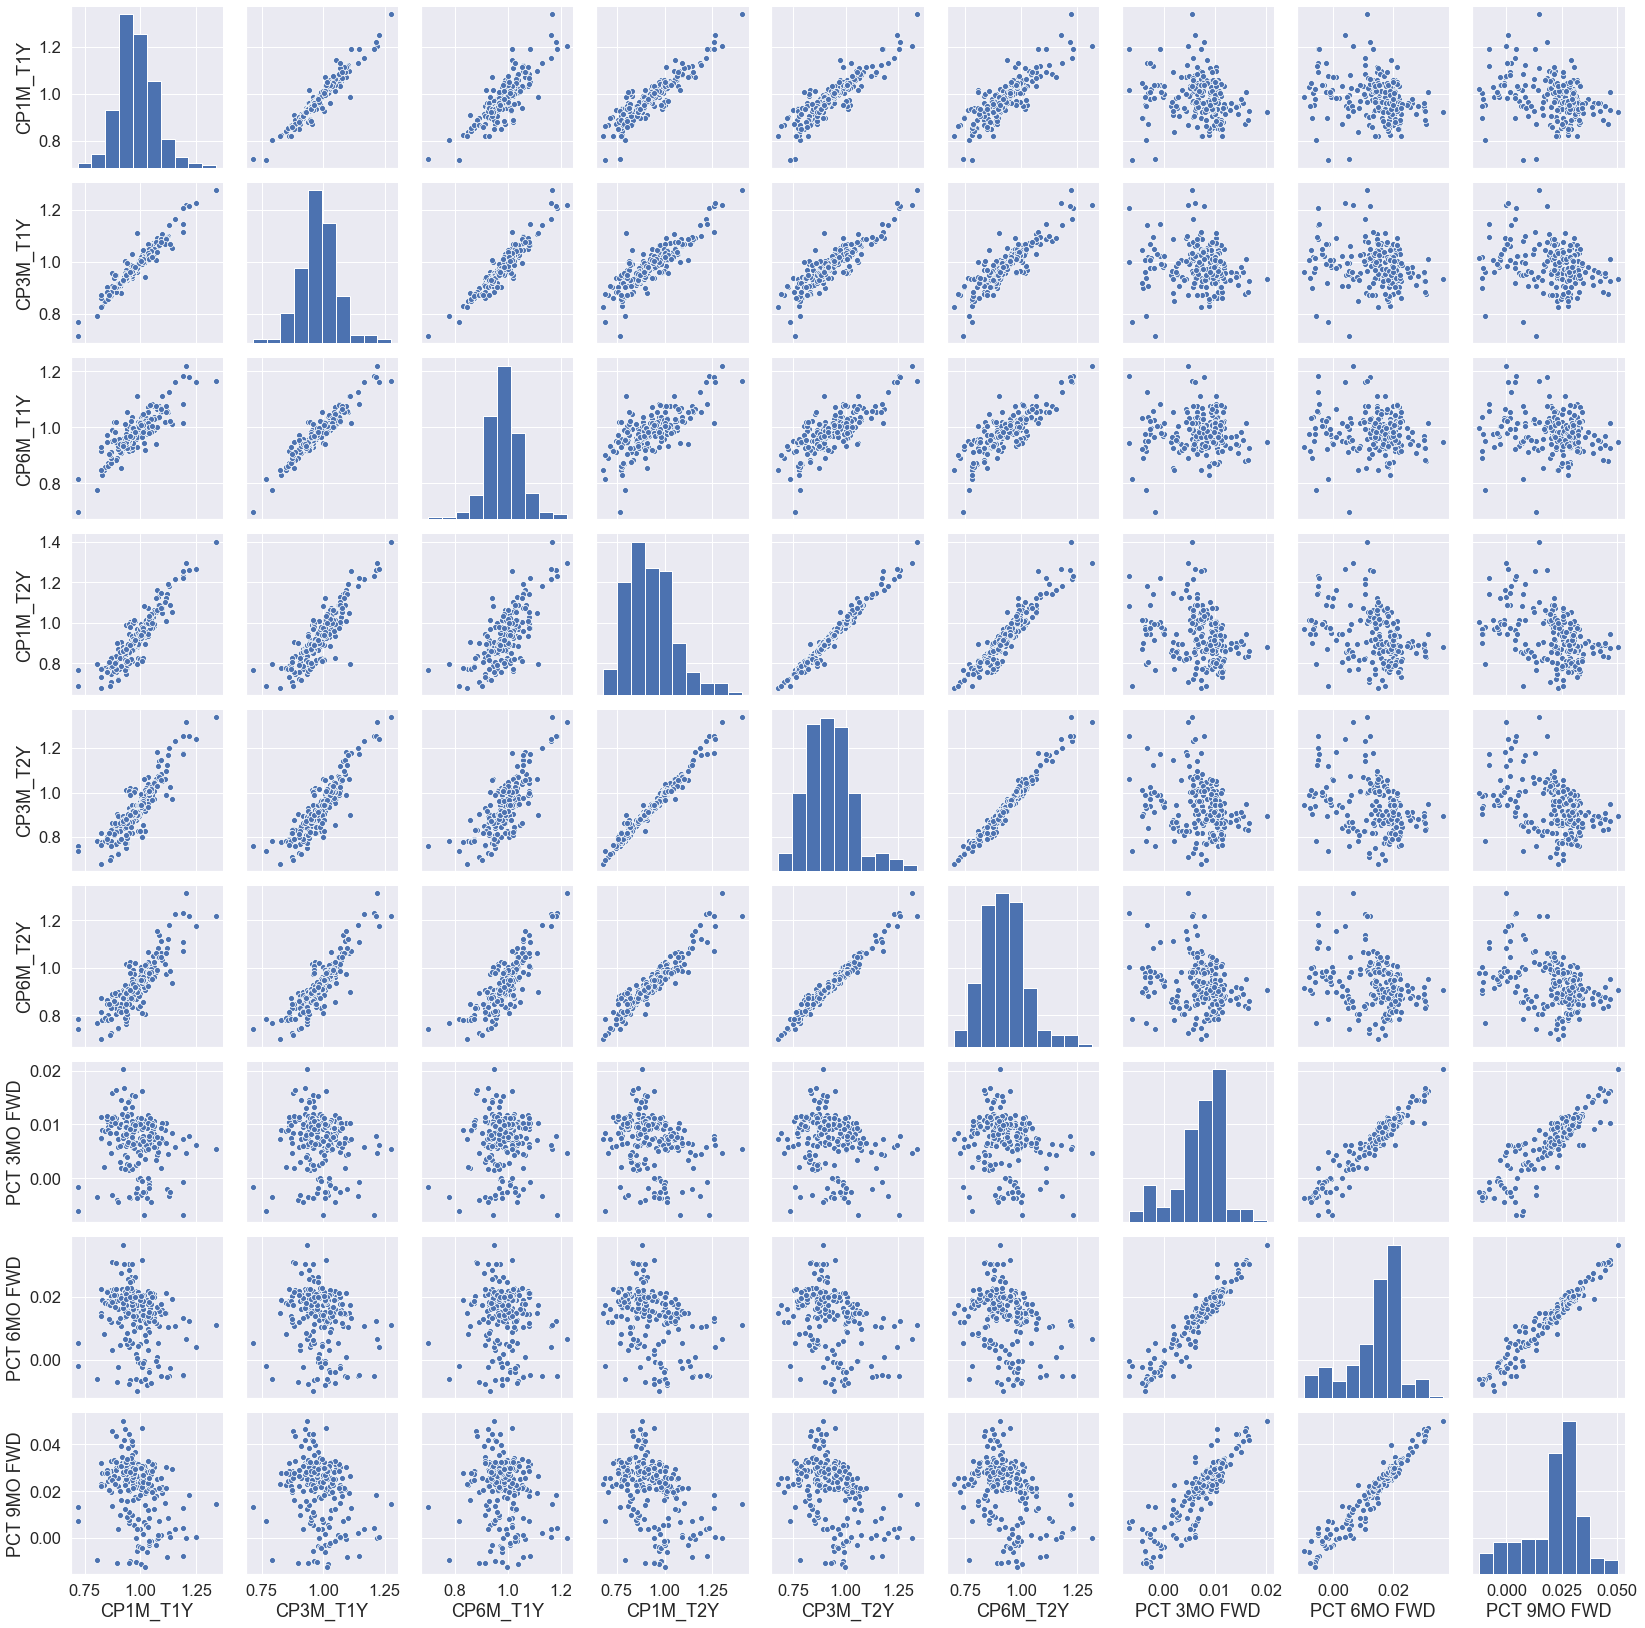

In [34]:
pair = df.iloc[:,[9,10,11,12,13,14,16,17,18]]
sns.pairplot(pair)
plt.show()

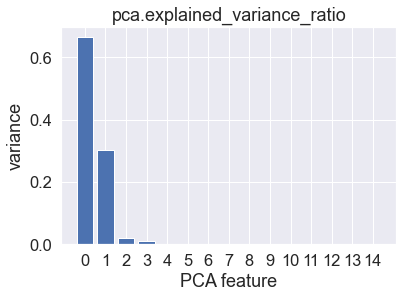

pca.explained_variance_ratio: 
[6.64013901e-01 3.01776762e-01 1.95303549e-02 1.14701119e-02
 2.06651467e-03 5.68426103e-04 3.85359769e-04 9.31645854e-05
 5.77776086e-05 1.91005882e-05 9.09155294e-06 4.32758398e-06
 3.43700315e-06 1.52957019e-06 1.40703314e-07]


In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
pca = PCA()
pca.fit(X_train_std)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.title('pca.explained_variance_ratio')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
print('pca.explained_variance_ratio: ')
print(pca.explained_variance_ratio_)

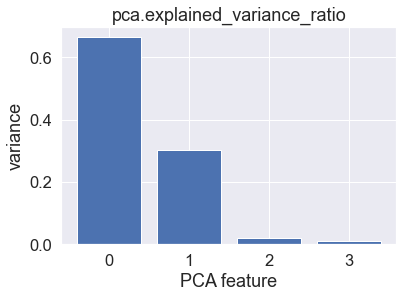

pca.explained_variance_ratio: 
[0.6640139  0.30177676 0.01953035 0.01147011]

cummulative explained variance of 3 components:  0.9967911302582136


In [36]:
pca = PCA(n_components = 4)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.title('pca.explained_variance_ratio')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
print('pca.explained_variance_ratio: ')
print(pca.explained_variance_ratio_)
print('')
print('cummulative explained variance of 3 components: ', pca.explained_variance_ratio_.sum())

------------------------
PCT 3MO FWD
MSE CV train: 2.4153081121979804e-05 +/- 9.509888981384928e-06
MSE test:0.00002200


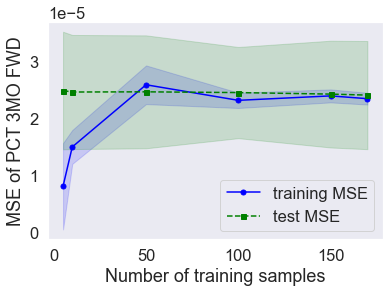

------------------------
PCT 6MO FWD
MSE CV train: 8.717054881705367e-05 +/- 3.3166586989006264e-05
MSE test:0.00007172


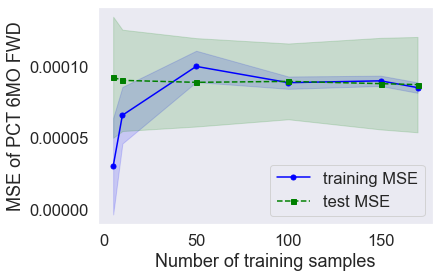

------------------------
PCT 9MO FWD
MSE CV train: 0.00017695037755456622 +/- 6.873553691947647e-05
MSE test:0.00014716


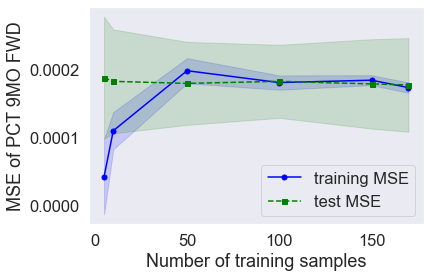

In [61]:
# ElasticRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
for i in [0,1,2]:
    reg = ElasticNet(alpha=0.1,l1_ratio = 0.5)
    scores = cross_val_score(estimator = reg,
                             X = X_train_pca,
                             y = y_train[:,i],
                             cv = 10,
                             scoring = 'neg_mean_squared_error',
                             n_jobs = -1)
    reg.fit(X_train_pca,y_train[:,i])
    y_pred = reg.predict(X_test_pca)
    y_train_pred = reg.predict(X_train_pca)
    #MSE
    from sklearn.metrics import mean_squared_error
    print('------------------------')
    print(y_names[i])
    print('MSE CV train:', -scores.mean(), "+/-", scores.std())
    print('MSE test:%.8f'%(mean_squared_error(y_test[:,i], y_pred)))
    
    train_sizes,train_scores,test_scores=learning_curve(estimator = ElasticNet(alpha=0.1,l1_ratio = 0.5),
                                                        X = X_train_pca,
                                                        y = y_train[:,i],
                                                        cv=10,
                                                        train_sizes = [5,10,50,100,150,170], 
                                                        scoring ='neg_mean_squared_error')
    train_mean = -train_scores.mean(axis = 1)
    train_std = -train_scores.std(axis = 1)
    test_mean = -test_scores.mean(axis = 1)
    test_std = -test_scores.std(axis = 1)
    plt.plot(train_sizes,train_mean,
             color='blue',marker='o',
             markersize=5,label='training MSE')
    plt.fill_between(train_sizes, 
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,
             color='green',linestyle='--',marker='s',
             markersize=5,label='test MSE')
    plt.fill_between(train_sizes, 
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15,color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('MSE of PCT '+str(3+3*i)+'MO FWD')
    plt.legend(loc='lower right')
    plt.show()


In [38]:
# ElasticRegression Gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
for i in [0,1,2]:
    reg = ElasticNet()
    params_alpha = [{'alpha':[0.001,0.005,0.01,0.05,0.1,0.5],
                     'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}]
    gs = GridSearchCV(estimator=reg,param_grid=params_alpha,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
    gs.fit(X_train_pca,y_train[:,i])
    print('------------------------')
    print(y_names[i])
    print('best score: ',-gs.best_score_)
    print('best params: ', gs.best_params_)
    #fit the data with best_params
    clf = gs.best_estimator_
    clf.fit(X_train_pca, y_train[:,i])
    y_pred = clf.predict(X_test_pca)
    #MSE
    print('MSE test:%.8f'%(mean_squared_error(y_test[:,i], y_pred)))
    


C:\Users\Jackt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018480732033702583, tolerance: 4.450762490511342e-07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jackt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018480732033702583, tolerance: 4.450762490511342e-07
  model = cd_fast.enet_coordinate_descent(


------------------------
PCT 3MO FWD
best score:  2.064023995697463e-05
best params:  {'alpha': 0.5, 'l1_ratio': 0}
MSE test:0.00002045


C:\Users\Jackt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006141767306323891, tolerance: 1.6096993139062793e-06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jackt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006141767306323891, tolerance: 1.6096993139062793e-06
  model = cd_fast.enet_coordinate_descent(


------------------------
PCT 6MO FWD
best score:  6.881579866921603e-05
best params:  {'alpha': 0.1, 'l1_ratio': 0}
MSE test:0.00005967
------------------------
PCT 9MO FWD
best score:  0.00013153663075235732
best params:  {'alpha': 0.001, 'l1_ratio': 0.3}
MSE test:0.00010924


------------------------
PCT 3MO FWD
MSE CV train: 2.1239862220631553e-05 +/- 7.445121922233132e-06
MSE test:0.00021365


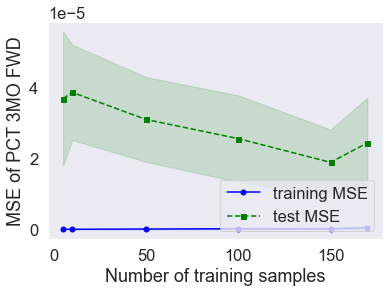

------------------------
PCT 6MO FWD
MSE CV train: 5.267773595899137e-05 +/- 2.916434911746244e-05
MSE test:0.00011236


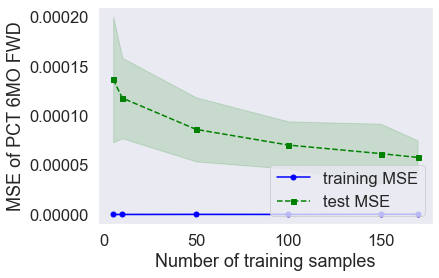

------------------------
PCT 9MO FWD
MSE CV train: 8.502179812648582e-05 +/- 4.685353409511023e-05
MSE test:0.00014716


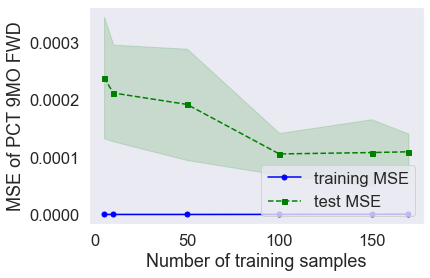

In [62]:
# Desicion tree Regreesion
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
for i in [0,1,2]:
    tree = DecisionTreeRegressor(max_depth = 10)
    scores = cross_val_score(estimator = tree,
                             X = X_train,
                             y = y_train[:,i],
                             cv = 10,
                             scoring = 'neg_mean_squared_error',
                             n_jobs = -1)
    tree.fit(X_train, y_train[:,i])
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    print('------------------------')
    print(y_names[i])
    print('MSE CV train:', -scores.mean(), "+/-", scores.std())
    print('MSE test:%.8f'%(mean_squared_error(y_test[:,i], y_pred)))
    train_sizes,train_scores,test_scores=learning_curve(estimator = DecisionTreeRegressor(max_depth = 10),
                                                        X = X_train_pca,
                                                        y = y_train[:,i],
                                                        cv=10,
                                                        train_sizes = [5,10,50,100,150,170], 
                                                        scoring ='neg_mean_squared_error')
    train_mean = -train_scores.mean(axis = 1)
    train_std = -train_scores.std(axis = 1)
    test_mean = -test_scores.mean(axis = 1)
    test_std = -test_scores.std(axis = 1)
    plt.plot(train_sizes,train_mean,
             color='blue',marker='o',
             markersize=5,label='training MSE')
    plt.fill_between(train_sizes, 
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,
             color='green',linestyle='--',marker='s',
             markersize=5,label='test MSE')
    plt.fill_between(train_sizes, 
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15,color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('MSE of PCT '+str(3+3*i)+'MO FWD')
    plt.legend(loc='lower right')
    plt.show()


In [40]:
# Desicion tree Regreesion GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
for i in [0,1,2]:
    tree = DecisionTreeRegressor()
    param_grid = [{'max_depth': [5,6,7,8,9,10,11,12,13,14,15]},
                  {'min_samples_leaf': [2,3,4,5,6,7,8,9,10]}]
    gs = GridSearchCV(estimator = tree, 
                      param_grid = param_grid, 
                      scoring = 'neg_mean_squared_error',
                      cv = 10,
                      n_jobs = -1)
    gs = gs.fit(X_train,y_train[:,i])
    print('---------------------')
    print(y_names[i])
    print('best score: ',-gs.best_score_)
    print('best params: ', gs.best_params_)

    clf = gs.best_estimator_
    clf.fit(X_train, y_train[:,i])
    y_pred = clf.predict(X_test)
    print('Test MSE: ', MSE(y_test[:,i], y_pred))


---------------------
PCT 3MO FWD
best score:  1.7872584868539424e-05
best params:  {'min_samples_leaf': 5}
Test MSE:  2.4753768520245975e-05
---------------------
PCT 6MO FWD
best score:  3.942048176598233e-05
best params:  {'min_samples_leaf': 7}
Test MSE:  6.258999516655475e-05
---------------------
PCT 9MO FWD
best score:  6.67410214666667e-05
best params:  {'min_samples_leaf': 2}
Test MSE:  0.00010153234013206642


----------------------
PCT 3MO FWD
MSE CV train: 1.7559902546505488e-05 +/- 5.856158671136617e-06
MSE test:  1.9820913616994595e-05


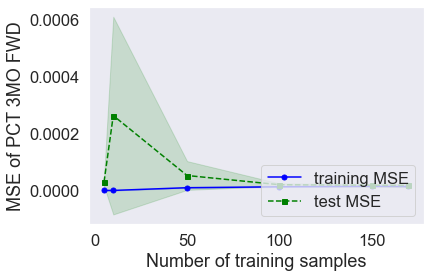

----------------------
PCT 6MO FWD
MSE CV train: 6.183494626165286e-05 +/- 1.8075354670038417e-05
MSE test:  5.7894466436841006e-05


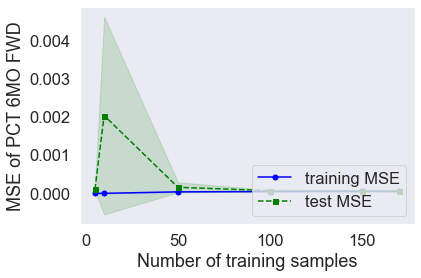

----------------------
PCT 9MO FWD
MSE CV train: 0.00012206247418091686 +/- 3.3655051615936984e-05
MSE test:  9.94311980065981e-05


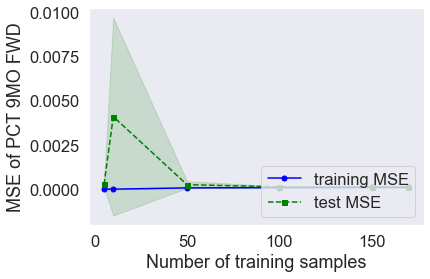

In [63]:
#Polynomial linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
reg= LinearRegression()
for i in [0,1,2]:
    quadratic = PolynomialFeatures(degree = 2)
    X_train_quad = quadratic.fit_transform(X_train_pca)
    X_test_quad = quadratic.fit_transform(X_test_pca)
    scores = cross_val_score(estimator = reg,
                             X = X_train_quad,
                             y = y_train[:,i],
                             cv = 10,
                             scoring = 'neg_mean_squared_error',
                             n_jobs = -1)
    reg.fit(X_train_quad, y_train[:,i])
    y_train_pred = reg.predict(X_train_quad)
    y_test_pred = reg.predict(X_test_quad)
    print('----------------------')
    print(y_names[i])
    print('MSE CV train:', -scores.mean(), "+/-", scores.std())
    print("MSE test: ",MSE(y_test[:,i], y_test_pred))
    train_sizes,train_scores,test_scores=learning_curve(estimator = reg,
                                                        X = X_train_quad,
                                                        y = y_train[:,i],
                                                        cv=10,
                                                        train_sizes = [5,10,50,100,150,170], 
                                                        scoring ='neg_mean_squared_error')
    train_mean = -train_scores.mean(axis = 1)
    train_std = -train_scores.std(axis = 1)
    test_mean = -test_scores.mean(axis = 1)
    test_std = -test_scores.std(axis = 1)
    plt.plot(train_sizes,train_mean,
             color='blue',marker='o',
             markersize=5,label='training MSE')
    plt.fill_between(train_sizes, 
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,
             color='green',linestyle='--',marker='s',
             markersize=5,label='test MSE')
    plt.fill_between(train_sizes, 
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15,color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('MSE of PCT '+str(3+3*i)+'MO FWD')
    plt.legend(loc='lower right')
    plt.show()


In [42]:
#Polynomial linear regression and tuning
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
for i in [0,1,2]:
    quadratic = PolynomialFeatures(degree = 2)
    X_train_quad = quadratic.fit_transform(X_train_pca)
    X_test_quad = quadratic.fit_transform(X_test_pca)
    reg = ElasticNet()
    params_alpha = [{'alpha':[0, 0.1, 0.5, 1.0],
                     'l1_ratio':[0, 0.2, 0.4, 0.6 ,0.8, 1]}]
    gs = GridSearchCV(estimator=reg,param_grid=params_alpha,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
    gs.fit(X_train_quad,y_train[:,i])
    print('------------------------')
    print(y_names[i])
    print('best score: ',-gs.best_score_)
    print('best params: ', gs.best_params_)
    #fit the data with best_params
    clf = gs.best_estimator_
    clf.fit(X_train_quad, y_train[:,i])
    y_pred = clf.predict(X_test_quad)
    #MSE
    print('MSE test:%.8f'%(mean_squared_error(y_test[:,i], y_pred)))


C:\Users\Jackt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013912015076812465, tolerance: 4.450762490511342e-07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jackt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0013912015076812465, tolerance: 4.450762490511342e-07
  model = cd_fast.enet_coordinate_descent(


------------------------
PCT 3MO FWD
best score:  1.705623673467146e-05
best params:  {'alpha': 0.1, 'l1_ratio': 0}
MSE test:0.00001993


C:\Users\Jackt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0049578226208693696, tolerance: 1.6096993139062793e-06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jackt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0049578226208693696, tolerance: 1.6096993139062793e-06
  model = cd_fast.enet_coordinate_descent(


------------------------
PCT 6MO FWD
best score:  5.857215612590413e-05
best params:  {'alpha': 0.1, 'l1_ratio': 0}
MSE test:0.00005718
------------------------
PCT 9MO FWD
best score:  0.0001152257220964579
best params:  {'alpha': 0.1, 'l1_ratio': 0}
MSE test:0.00010027


C:\Users\Jackt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009805775458552728, tolerance: 3.2732723084970775e-06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Jackt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009805775458552728, tolerance: 3.2732723084970775e-06
  model = cd_fast.enet_coordinate_descent(


--------------------------
PCT 3MO FWD
MSE CV train: 1.3024134854257912e-05 +/- 5.950213071176152e-06
MSE test:0.00001744


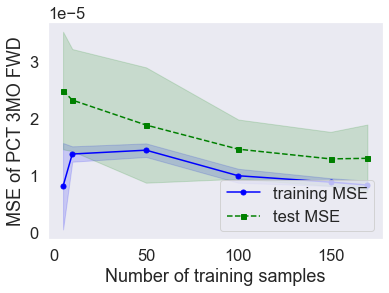

--------------------------
PCT 6MO FWD
MSE CV train: 3.436394715275783e-05 +/- 9.243056909868476e-06
MSE test:0.00004752


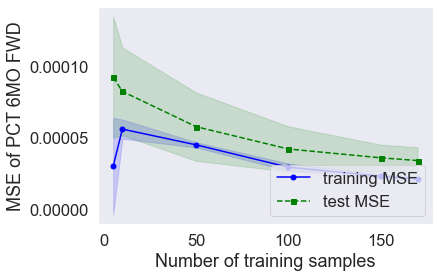

--------------------------
PCT 9MO FWD
MSE CV train: 5.723763483952306e-05 +/- 1.3304804518775831e-05
MSE test:0.00008569


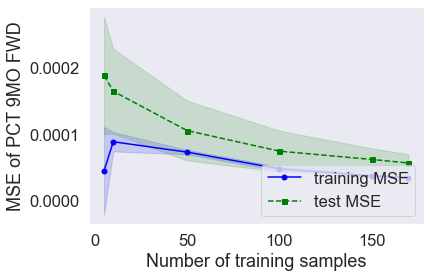

In [64]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
for i in [0,1,2]:
    knn = KNeighborsRegressor(n_neighbors=5)
    scores = cross_val_score(estimator = knn,
                             X = X_train_pca,
                             y = y_train[:,i],
                             cv = 10,
                             scoring = 'neg_mean_squared_error',
                             n_jobs = -1)
    knn.fit(X_train_pca,y_train[:,i])
    y_pred = knn.predict(X_test_pca)
    y_train_pred = knn.predict(X_train_pca)
    #MSE
    from sklearn.metrics import mean_squared_error
    print('--------------------------')
    print(y_names[i])
    print('MSE CV train:', -scores.mean(), "+/-", scores.std())
    print('MSE test:%.8f'%(mean_squared_error(y_test[:,i], y_pred)))
    train_sizes,train_scores,test_scores=learning_curve(estimator = KNeighborsRegressor(n_neighbors=5),
                                                        X = X_train_pca,
                                                        y = y_train[:,i],
                                                        cv=10,
                                                        train_sizes = [5,10,50,100,150,170], 
                                                        scoring ='neg_mean_squared_error')
    train_mean = -train_scores.mean(axis = 1)
    train_std = -train_scores.std(axis = 1)
    test_mean = -test_scores.mean(axis = 1)
    test_std = -test_scores.std(axis = 1)
    plt.plot(train_sizes,train_mean,
             color='blue',marker='o',
             markersize=5,label='training MSE')
    plt.fill_between(train_sizes, 
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,
             color='green',linestyle='--',marker='s',
             markersize=5,label='test MSE')
    plt.fill_between(train_sizes, 
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15,color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('MSE of PCT '+str(3+3*i)+'MO FWD')
    plt.legend(loc='lower right')
    plt.show()

In [44]:
#KNN gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
for i in [0,1,2]:
    knn = KNeighborsRegressor()
    params_grid = [{'weights':['uniform'],'n_neighbors':[i for i in range(1,20)],'p':[i for i in range(1,6)]},
                  {'weights':['distance'],'n_neighbors':[i for i in range(1,20)],'p':[i for i in range(1,6)]}]
           
    grid2=GridSearchCV(estimator=knn,param_grid=params_grid,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
    grid2.fit(X_train_pca,y_train[:,i])
    #fit the data with best_params
    knn = grid2.best_estimator_
    knn.fit(X_train_pca,y_train[:,i])
    y_pred = knn.predict(X_test_pca)
    #MSE
    print('------------------')
    print(y_names[i])
    print(grid2.best_params_)
    print('MSE CV train:%.8f'%-grid2.best_score_)
    print('MSE test:%.8f'%(MSE(y_test[:,i], y_pred)))


------------------
PCT 3MO FWD
{'n_neighbors': 4, 'p': 3, 'weights': 'distance'}
MSE CV train:0.00001142
MSE test:0.00001587
------------------
PCT 6MO FWD
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
MSE CV train:0.00002697
MSE test:0.00004234
------------------
PCT 9MO FWD
{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
MSE CV train:0.00004519
MSE test:0.00006558


In [45]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
for i in [0,1,2]:
    forest = RandomForestRegressor(n_estimators = 500,
                                   criterion = 'mse',
                                   random_state = 1,
                                   n_jobs = -1)
    scores = cross_val_score(estimator = forest,
                             X = X_train,
                             y = y_train[:,i],
                             cv = 10,
                             scoring = 'neg_mean_squared_error',
                             n_jobs = -1)
    forest.fit(X_train, y_train[:,i])
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)
    print('-----------------')
    print(y_names[i])
    print('MSE CV train:', -scores.mean(), "+/-", scores.std())
    print("MSE test: ",MSE(y_test[:,i], y_test_pred))

-----------------
PCT 3MO FWD
MSE CV train: 1.2540998168733319e-05 +/- 4.9464481072148515e-06
MSE test:  1.4227587170394483e-05
-----------------
PCT 6MO FWD
MSE CV train: 2.9413417763540522e-05 +/- 1.0558438739207824e-05
MSE test:  3.9370357582697526e-05
-----------------
PCT 9MO FWD
MSE CV train: 4.7303862476772094e-05 +/- 2.0180674947185042e-05
MSE test:  6.523328127940926e-05


----------------
PCT 3MO FWD
best params:  {'max_depth': 10, 'n_estimators': 100}
best score:  1.248867165622987e-05
Test MSE:  1.4566955598598468e-05


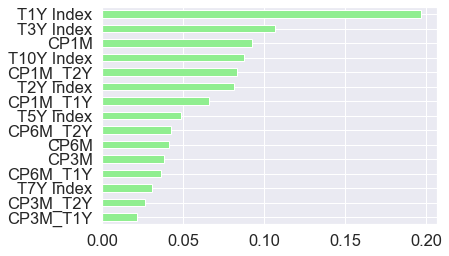

----------------
PCT 6MO FWD
best params:  {'max_depth': 12, 'n_estimators': 100}
best score:  2.9150970121791463e-05
Test MSE:  3.987132696833037e-05


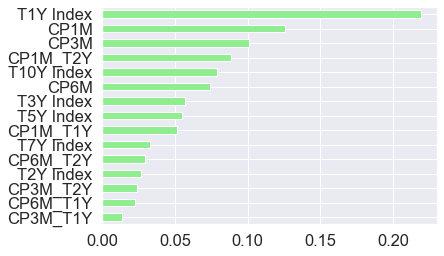

----------------
PCT 9MO FWD
best params:  {'max_depth': 10, 'n_estimators': 200}
best score:  4.671662752453189e-05
Test MSE:  6.680502070556273e-05


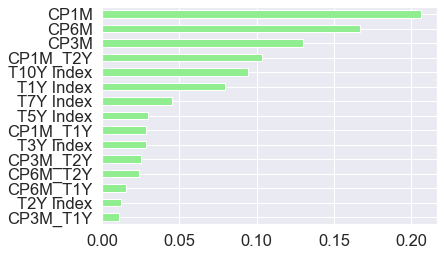

In [67]:
#Random forest GridSearch
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
for i in [0,1,2]:
    forest = RandomForestRegressor(criterion = 'mse',
                                   random_state = 1,
                                   n_jobs = -1)
    params_grid = [{'n_estimators': [100,200,300,400,500],
                    'max_depth': [1,5,10,12]}]
    gs = GridSearchCV(estimator = forest, 
                      param_grid = params_grid, 
                      cv=10,
                      scoring='neg_mean_squared_error',n_jobs=-1 )
    gs = gs.fit(X_train,y_train[:,i])
    print('----------------')
    print(y_names[i])
    print('best params: ', gs.best_params_)
    print('best score: ',-gs.best_score_)
    clf = gs.best_estimator_
    clf.fit(X_train, y_train[:,i])
    y_pred = clf.predict(X_test)
    print('Test MSE: ', MSE(y_test[:,i], y_pred))
    importance_rf=pd.Series(clf.feature_importances_,index=df.columns[0:15])
    sorted_importance_rf=importance_rf.sort_values()
    sorted_importance_rf.plot(kind='barh',color='lightgreen')
    plt.show()